**Dirchelet Multinomial Model**
1. Multivariate Bayesian Case for Binomial
2. Ex: For example we have a multi sided di, we can model this with dirchelet Multinomial
3. The dirchelet function is a conjugate prior of the Multinomial

**SCODA limitations**
1. Uses a log-linear relationship between covariates (x) and cell abundance (Y)
2. for continuous biological covariates, this relationship may not be true (gene expression, other metadata)

In [1]:
!pip install sccoda pertpy

  Using cached scCODA-0.1.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached pertpy-0.9.4-py3-none-any.whl.metadata (6.9 kB)
  Using cached tensorflow_probability-0.24.0-py2.py3-none-any.whl.metadata (13 kB)
  Using cached arviz-0.19.0-py3-none-any.whl.metadata (8.9 kB)
  Using cached decoupler-1.8.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached lamin_utils-0.13.4-py2.py3-none-any.whl.metadata (980 bytes)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached PubChemPy-1.0.4-py3-none-any.whl
  Using cached scikit_misc-0.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.0 kB)
  Using cached scvi_tools-1.1.6.post2-py3-none-any.whl.metadata (18 kB)
  Using cached dm_tree-0.1.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached xarray-2024.9.0-py3-none-any.whl.metadata (11 kB)
  Using cached h5netcdf-1.3.0-py3-none-any.whl.metadata (13 kB)
  Using cached xarray_einstats-0.7.0-py3-none-any.wh

In [2]:
!pip install toytree arviz ete3

  Using cached toytree-3.0.5-py3-none-any.whl.metadata (3.6 kB)
  Using cached ete3-3.1.3-py3-none-any.whl
  Using cached loguru-0.7.2-py3-none-any.whl.metadata (23 kB)
  Using cached toyplot-1.0.3-py3-none-any.whl
  Using cached custom_inherit-2.4.1-py3-none-any.whl.metadata (838 bytes)
  Using cached pypng-0.20220715.0-py3-none-any.whl.metadata (13 kB)
  Using cached reportlab-4.2.2-py3-none-any.whl.metadata (1.4 kB)
Using cached toytree-3.0.5-py3-none-any.whl (382 kB)
Using cached loguru-0.7.2-py3-none-any.whl (62 kB)
Using cached custom_inherit-2.4.1-py3-none-any.whl (15 kB)
Using cached pypng-0.20220715.0-py3-none-any.whl (58 kB)
Using cached reportlab-4.2.2-py3-none-any.whl (1.9 MB)


In [55]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import scanpy as sc
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import pertpy as pt

import itertools

In [4]:
adata = pt.dt.haber_2017_regions()

In [21]:
pt.pl

<module 'pertpy.plot' from '/opt/conda/lib/python3.10/site-packages/pertpy/plot/__init__.py'>

In [22]:
sccoda_model  =  pt.tl.Sccoda()
sccoda_data   =  sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_label",
    sample_identifier="batch",
    covariate_obs=["condition"],
)


sccoda_data

MuData object with n_obs × n_vars = 9852 × 15223
  2 modalities
    rna:	9842 x 15215
      obs:	'batch', 'barcode', 'condition', 'cell_label', 'scCODA_sample_id'
    coda:	10 x 8
      obs:	'condition', 'batch'
      var:	'n_cells'

In [8]:
boxplot_data = adata.to_df()

1. For each condition, we want to see to boxplots for each cell type

In [62]:
boxplot_data

index,A130010J15Rik,A130014A01Rik,A130051J06Rik,A130057D12Rik,A1cf,A230005M16Rik,A230046K03Rik,A230050P20Rik,A230060F14Rik,A230065N10Rik,...,Zufsp,Zw10,Zwilch,Zwint,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3
index,,,,,,,,,,,,,,,,,,,,,
B1_AAACATACCACAAC_Control_Enterocyte.Progenitor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B1_AAACGCACGAGGAC_Control_Stem,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B1_AAACGCACTAGCCA_Control_Stem,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B1_AAACGCACTGTCCC_Control_Stem,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B1_AAACTTGACCACCT_Control_Enterocyte.Progenitor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B10_TTTCACGACAAGCT_Salmonella_TA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B10_TTTCAGTGAGGCGA_Salmonella_Enterocyte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B10_TTTCAGTGCGACAT_Salmonella_Stem,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
adata.obs

,batch,barcode,condition,cell_label,scCODA_sample_id
index,,,,,
B1_AAACATACCACAAC_Control_Enterocyte.Progenitor,B1,AAACATACCACAAC,Control,Enterocyte.Progenitor,B1
B1_AAACGCACGAGGAC_Control_Stem,B1,AAACGCACGAGGAC,Control,Stem,B1
B1_AAACGCACTAGCCA_Control_Stem,B1,AAACGCACTAGCCA,Control,Stem,B1
B1_AAACGCACTGTCCC_Control_Stem,B1,AAACGCACTGTCCC,Control,Stem,B1
B1_AAACTTGACCACCT_Control_Enterocyte.Progenitor,B1,AAACTTGACCACCT,Control,Enterocyte.Progenitor,B1
...,...,...,...,...,...
B10_TTTCACGACAAGCT_Salmonella_TA,B10,TTTCACGACAAGCT,Salmonella,TA,B10
B10_TTTCAGTGAGGCGA_Salmonella_Enterocyte,B10,TTTCAGTGAGGCGA,Salmonella,Enterocyte,B10
B10_TTTCAGTGCGACAT_Salmonella_Stem,B10,TTTCAGTGCGACAT,Salmonella,Stem,B10


In [66]:
adata.obs['barcode'].unique()

['AAACATACCACAAC', 'AAACGCACGAGGAC', 'AAACGCACTAGCCA', 'AAACGCACTGTCCC', 'AAACTTGACCACCT', ..., 'TTTCACGACAAGCT', 'TTTCAGTGAGGCGA', 'TTTCAGTGCGACAT', 'TTTCAGTGTGACCA', 'TTTCAGTGTTCTCA']
Length: 9774
Categories (9774, object): ['AAACATACAGCATC', 'AAACATACCACAAC', 'AAACATACCACTGA', 'AAACATACCCACAA', ..., 'TTTGCATGCGTAGT', 'TTTGCATGCTCTTA', 'TTTGCATGGACAGG', 'TTTGCATGGAGGCA']

In [59]:
cell_types

['Enterocyte.Progenitor', 'Stem', 'TA.Early', 'TA', 'Tuft', 'Enterocyte', 'Goblet', 'Endocrine']
Categories (8, object): ['Endocrine', 'Enterocyte', 'Enterocyte.Progenitor', 'Goblet', 'Stem', 'TA', 'TA.Early', 'Tuft']

In [60]:
expression_sums = pd.DataFrame(boxplot_data.sum(axis = 1), columns = ['expression'])
expression_sums = pd.concat([expression_sums, adata.obs[['condition', 'cell_label']]], axis = 1)

conditions      = expression_sums['condition'].unique()
cell_types      = expression_sums['cell_label'].unique()

combinations    = itertools.product(conditions, cell_types)

for combination in combinations:
    condition           = combination[0]
    cell_type           = combination[1]

    expression_subset   = expression_sums[(expression_sums['condition'] == condition) & (expression_sums['cell_label'] == cell_type)]
    break

In [68]:
sccoda_data

MuData object with n_obs × n_vars = 9852 × 15223
  3 modalities
    rna:	9842 x 15215
      obs:	'batch', 'barcode', 'condition', 'cell_label', 'scCODA_sample_id'
    coda:	10 x 8
      obs:	'condition', 'batch'
      var:	'n_cells'
    coda_salm:	6 x 8
      obs:	'condition', 'batch'
      var:	'n_cells'

In [67]:
sccoda_data.mod["coda_salm"] = sccoda_data["coda"][
    sccoda_data["coda"].obs["condition"].isin(["Control", "Salmonella"])
].copy()

AnnData object with n_obs × n_vars = 6 × 8
    obs: 'condition', 'batch'
    var: 'n_cells'


In [69]:
sccoda_data

MuData object with n_obs × n_vars = 9852 × 15223
  3 modalities
    rna:	9842 x 15215
      obs:	'batch', 'barcode', 'condition', 'cell_label', 'scCODA_sample_id'
    coda:	10 x 8
      obs:	'condition', 'batch'
      var:	'n_cells'
    coda_salm:	6 x 8
      obs:	'condition', 'batch'
      var:	'n_cells'

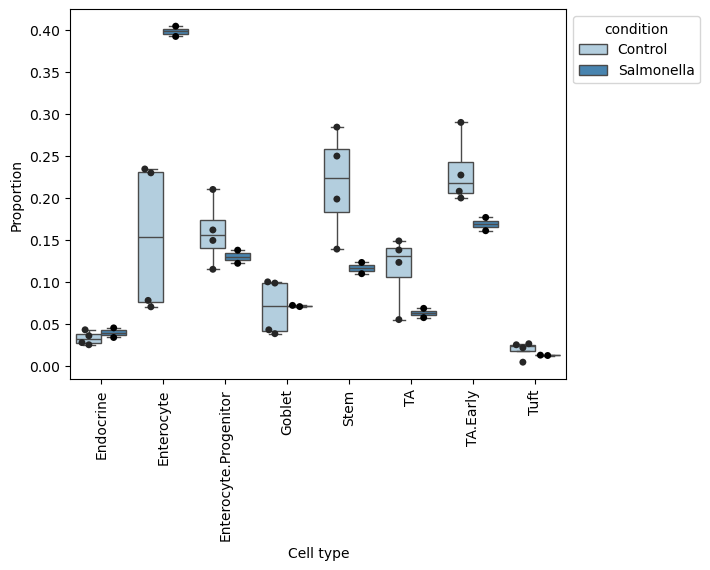

In [70]:
sccoda_model.plot_boxplots(sccoda_data, modality_key="coda_salm", feature_name="condition", add_dots=True)
plt.show()

In [71]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda_salm",
    formula="condition",
    reference_cell_type="Goblet",
)

In [74]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda_salm")
sccoda_data["coda_salm"]

sample: 100%|██████████| 11000/11000 [02:37<00:00, 69.88it/s, 127 steps of size 3.01e-02. acc. prob=0.80]


AnnData object with n_obs × n_vars = 6 × 8
    obs: 'condition', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_condition[T.Salmonella]'

For the effect summary, the first column again shows the inferred parameters for all combinations of covariates and cell types. Most important is the distinctions between zero and non-zero entries A value of zero means that no statistically credible effect was detected. For a value other than zero, a credible change was detected. A positive sign indicates an increase, a negative sign a decrease in abundance.

In [86]:
sccoda_model.set_fdr(sccoda_data, modality_key="coda_salm", est_fdr=0.05)
sccoda_model.summary(sccoda_data, modality_key="coda_salm")

                                          Compositional Analysis summary                                           
┌──────────────────────────────────────────────┬──────────────────────────────────────────────────────────────────┐
│ Name                                         │ Value                                                            │
├──────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────┤
│ Data                                         │ Data: 6 samples, 8 cell types                                    │
│ Reference cell type                          │ Goblet                                                           │
│ Formula                                      │ condition                                                        │
└──────────────────────────────────────────────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                        Final Parameter  Expected Sample                                                         │
│ Cell Type                                                                                                       │
│ Endocrine                  1.118            34.850                                                              │
│ Enterocyte                 2.324           116.401                                                              │
│ Enterocyte.Progenitor      2.513           140.617                                                              │
│ Goblet                     1.743            65.108                                                              │
│ Stem                       2.699           169.362                                                              │
│ TA                         2.102            93.227                                                              │
│ TA.Early                   2.855           197.955                                                              │
│ Tuft                       0.428            17.480                                                              │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                              Final Parameter  Expected Sample  log2-fold change                 │
│ Covariate             Cell Type                                                                                 │
│ conditionT.Salmonella Endocrine                  0.000            24.894            -0.485                      │
│                       Enterocyte                 1.353           321.689             1.467                      │
│                       Enterocyte.Progenitor      0.000           100.446            -0.485                      │
│                       Goblet                     0.000            46.508            -0.485                      │
│                       Stem                       0.000           120.979            -0.485                      │
│                       TA                         0.000            66.594            -0.485                      │
│                       TA.Early                   0.000           141.404            -0.485                      │
│                       Tuft                       0.000            12.486            -0.485                      │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [81]:
test_model = pt.tl.Sccoda()
test_model.get_intercept_df(sccoda_data, modality_key="coda_salm")

,Final Parameter,HDI 3%,HDI 97%,SD,Expected Sample
Cell Type,,,,,
Endocrine,1.118,0.393,1.770,0.367,34.849575
Enterocyte,2.324,1.743,2.917,0.316,116.400980
Enterocyte.Progenitor,2.513,1.933,3.091,0.311,140.617151
Goblet,1.743,1.138,2.340,0.323,65.107578
Stem,2.699,2.119,3.255,0.307,169.362427
TA,2.102,1.479,2.700,0.330,93.227333
TA.Early,2.855,2.270,3.397,0.303,197.955242
Tuft,0.428,-0.340,1.145,0.398,17.479713
